# re 模块
- 正则式表达
- http://www.cnblogs.com/huxi/archive/2010/07/04/1771073.html

## 一、Python 应用
- Python通过re模块提供对正则表达式的支持。
- 使用re的一般步骤是:
  > - 先将正则表达式的字符串形式编译为Pattern实例，
  > - 然后使用Pattern实例处理文本并获得匹配结果（一个Match实例），
  > - 最后使用Match实例获得信息，进行其他的操作。

In [4]:
import re

from IPython.display import Image
%matplotlib inline

In [9]:
print(dir(re))

['A', 'ASCII', 'DEBUG', 'DOTALL', 'I', 'IGNORECASE', 'L', 'LOCALE', 'M', 'MULTILINE', 'S', 'Scanner', 'T', 'TEMPLATE', 'U', 'UNICODE', 'VERBOSE', 'X', '_MAXCACHE', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__version__', '_alphanum_bytes', '_alphanum_str', '_cache', '_cache_repl', '_compile', '_compile_repl', '_expand', '_locale', '_pattern_type', '_pickle', '_subx', 'compile', 'copyreg', 'error', 'escape', 'findall', 'finditer', 'fullmatch', 'match', 'purge', 'search', 'split', 'sre_compile', 'sre_parse', 'sub', 'subn', 'sys', 'template']


In [4]:
# 将正则表达式编译成Pattern对象
pattern = re.compile(r'hello')
 
# 使用Pattern匹配文本，获得匹配结果，无法匹配时将返回None
match = pattern.match('hello world!')
 
if match:    # 使用Match获得分组信息
    print(match.group())

hello


### 1 compile
- 这个方法是Pattern类的工厂方法，用于将字符串形式的正则表达式编译为Pattern对象。 
- 语法：
  > - re.compile(strPattern[, flag])
  > - 第二个参数flag是匹配模式，取值可以使用按位或运算符'|'表示同时生效，比如re.I | re.M。
  > - 另外，你也可以在regex字符串中指定模式，比如re.compile('pattern', re.I | re.M)与re.compile('(?im)pattern')是等价的。 

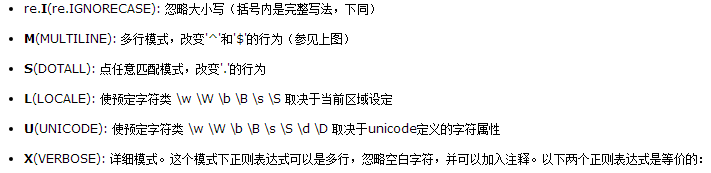

In [5]:
Image(filename="py35_picture\compile.png")

In [6]:
a = re.compile(r"""\d +  # the integral part
                   \.    # the decimal point
                   \d *  # some fractional digits""", re.X)

b = re.compile(r"\d+\.\d*")

- re提供了众多模块方法用于完成正则表达式的功能。
- 这些方法可以使用Pattern实例的相应方法替代，唯一的好处是少写一行re.compile()代码，但同时也无法复用编译后的Pattern对象。
- 这些方法将在Pattern类的实例方法部分一起介绍。
- 如上面这个例子可以简写为：

In [7]:
m = re.match(r'hello', 'hello world!')
print(m.group())

hello


- re模块还提供了一个方法escape(string)，用于将string中的正则表达式元字符如*/+/?等之前加上转义符再返回，在需要大量匹配元字符时有那么一点用。

### 2 Match
- Match对象是一次匹配的结果，包含了很多关于此次匹配的信息，可以使用Match提供的可读属性或方法来获取这些信息。
- 语法：
  > - match(string[, pos[, endpos]]) | re.match(pattern, string[, flags])
  > - 这个方法将从string的pos下标处起尝试匹配pattern；如果pattern结束时仍可匹配，则返回一个Match对象；如果匹配过程中pattern无法匹配，或者匹配未结束就已到达endpos，则返回None。 
  > - pos和endpos的默认值分别为0和len(string)；re.match()无法指定这两个参数，参数flags用于编译pattern时指定匹配模式。 
  > - 注意：这个方法并不是完全匹配。当pattern结束时若string还有剩余字符，仍然视为成功。想要完全匹配，可以在表达式末尾加上边界匹配符'$'。 

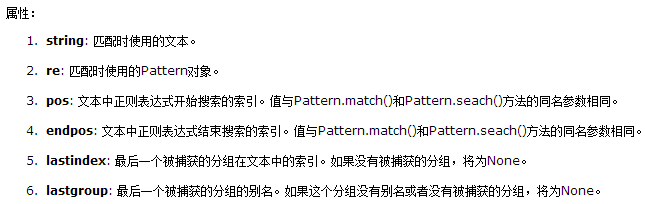

In [10]:
Image(filename="py35_picture\match_1.png")

In [12]:
m = re.match(r'(\w+) (\w+)(?P<sign>.*)', 'hello world!')
 
print("m.string:", m.string)
print("m.re:", m.re)
print("m.pos:", m.pos)
print("m.endpos:", m.endpos)
print("m.lastindex:", m.lastindex)
print("m.lastgroup:", m.lastgroup)

m.string: hello world!
m.re: re.compile('(\\w+) (\\w+)(?P<sign>.*)')
m.pos: 0
m.endpos: 12
m.lastindex: 3
m.lastgroup: sign


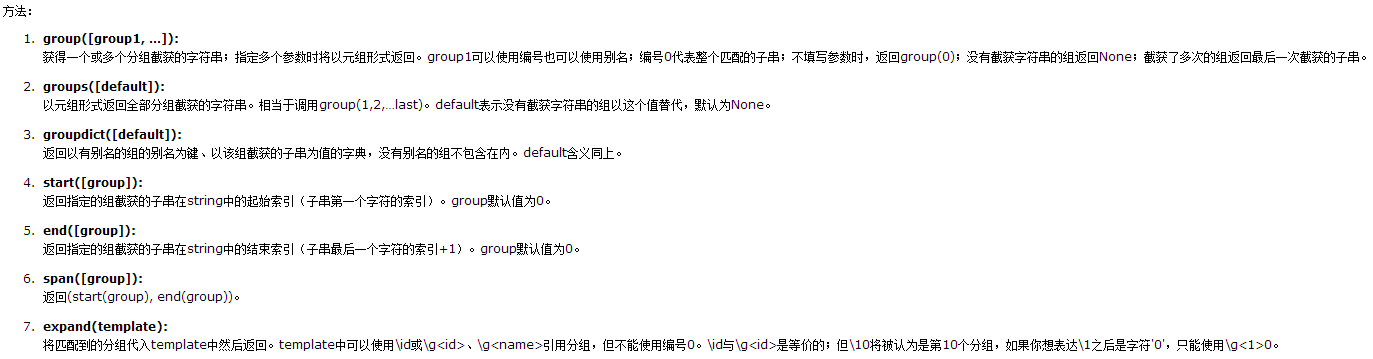

In [6]:
Image(filename="py35_picture\match_2.png")

In [13]:
print("m.group(1,2):", m.group(1, 2))
print("m.groups():", m.groups())
print("m.groupdict():", m.groupdict())
print("m.start(2):", m.start(2))
print("m.end(2):", m.end(2))
print("m.span(2):", m.span(2))
print(r"m.expand(r'\2 \1\3'):", m.expand(r'\2 \1\3'))

m.group(1,2): ('hello', 'world')
m.groups(): ('hello', 'world', '!')
m.groupdict(): {'sign': '!'}
m.start(2): 6
m.end(2): 11
m.span(2): (6, 11)
m.expand(r'\2 \1\3'): world hello!


In [23]:
match = re.match(r'This', 'This is re module of python')
print(match )
print(match.group())

match = re.match(r'python', 'This is re module of python')
print(match)

<_sre.SRE_Match object; span=(0, 4), match='This'>
This
None


### 3 Pattern
- Pattern对象是一个编译好的正则表达式，通过Pattern提供的一系列方法可以对文本进行匹配查找。
- Pattern不能直接实例化，必须使用re.compile()进行构造。
- Pattern提供了几个可读属性用于获取表达式的相关信息：
  > - pattern: 编译时用的表达式字符串。
  > - flags: 编译时用的匹配模式。数字形式。
  > - groups: 表达式中分组的数量。
  > - groupindex: 以表达式中有别名的组的别名为键、以该组对应的编号为值的字典，没有别名的组不包含在内。

In [14]:
p = re.compile(r'(\w+) (\w+)(?P<sign>.*)', re.DOTALL)
 
print("p.pattern:", p.pattern)
print("p.flags:", p.flags)
print("p.groups:", p.groups)
print("p.groupindex:", p.groupindex)

p.pattern: (\w+) (\w+)(?P<sign>.*)
p.flags: 48
p.groups: 3
p.groupindex: {'sign': 3}


### 4 search
- 用于查找字符串中可以匹配成功的子串。
- 语法：
  > - search(string[, pos[, endpos]]) | re.search(pattern, string[, flags]): 
  > - 从string的pos下标处起尝试匹配pattern，如果pattern结束时仍可匹配，则返回一个Match对象；若无法匹配，则将pos加1后重新尝试匹配；直到pos=endpos时仍无法匹配则返回None。 
  > - pos和endpos的默认值分别为0和len(string))；re.search()无法指定这两个参数，参数flags用于编译pattern时指定匹配模式。 

In [16]:
# 将正则表达式编译成Pattern对象 
pattern = re.compile(r'world') 
 
# 使用search()查找匹配的子串，不存在能匹配的子串时将返回None 
# 这个例子中使用match()无法成功匹配 
match = pattern.search('hello world!') 
 
if match:   # 使用Match获得分组信息     
    print(match.group())

world


### 5 split
- 按照能够匹配的子串将string分割后返回列表。
- 语法：
  > - split(string[, maxsplit]) | re.split(pattern, string[, maxsplit]): 
  > - maxsplit用于指定最大分割次数，不指定将全部分割。 

In [17]:
p = re.compile(r'\d+')
print(p.split('one1two2three3four4'))

['one', 'two', 'three', 'four', '']


### 6 findall
- 搜索string，以列表形式返回全部能匹配的子串。 
- 语法：
  > - findall(string[, pos[, endpos]]) | re.findall(pattern, string[, flags]): 

In [18]:
p = re.compile(r'\d+')
print(p.findall('one1two2three3four4'))

['1', '2', '3', '4']


### 7 finditer   
- 搜索string，返回一个顺序访问每一个匹配结果（Match对象）的迭代器。
- 语法：
  > - finditer(string[, pos[, endpos]]) | re.finditer(pattern, string[, flags]): 

In [19]:
p = re.compile(r'\d+')
for m in p.finditer('one1two2three3four4'):
    print(m.group())

1
2
3
4


### 8 sub
- 使用repl替换string中每一个匹配的子串后返回替换后的字符串。 
- 语法：
  > - sub(repl, string[, count]) | re.sub(pattern, repl, string[, count]): 
  > - 当repl是一个字符串时，可以使用\id或\g<id>、\g<name>引用分组，但不能使用编号0。 
  > - 当repl是一个方法时，这个方法应当只接受一个参数（Match对象），并返回一个字符串用于替换（返回的字符串中不能再引用分组）。 
  > - count用于指定最多替换次数，不指定时全部替换。 

In [20]:
p = re.compile(r'(\w+) (\w+)')
s = 'i say, hello world!'
 
print(p.sub(r'\2 \1', s))
 
def func(m):
    return m.group(1).title() + ' ' + m.group(2).title()
 
print(p.sub(func, s))

say i, world hello!
I Say, Hello World!


### 9 subn
- 语法：
  > - subn(repl, string[, count]) |re.sub(pattern, repl, string[, count]): 
  > - 返回 (sub(repl, string[, count]), 替换次数)。

In [21]:
p = re.compile(r'(\w+) (\w+)')
s = 'i say, hello world!'
 
print(p.subn(r'\2 \1', s))
 
def func(m):
    return m.group(1).title() + ' ' + m.group(2).title()
 
print(p.subn(func, s))

('say i, world hello!', 2)
('I Say, Hello World!', 2)


## 二、正则式表达基础

### 2.1 简单介绍
- 正则表达式并不是Python的一部分。
- 正则表达式是用于处理字符串的强大工具，拥有自己独特的语法以及一个独立的处理引擎，效率上可能不如str自带的方法，但功能十分强大。
- 得益于这一点，在提供了正则表达式的语言里，正则表达式的语法都是一样的，区别只在于不同的编程语言实现支持的语法数量不同；但不用担心，不被支持的语法通常是不常用的部分。
- 如果已经在其他语言里使用过正则表达式，只需要简单看一看就可以上手了。

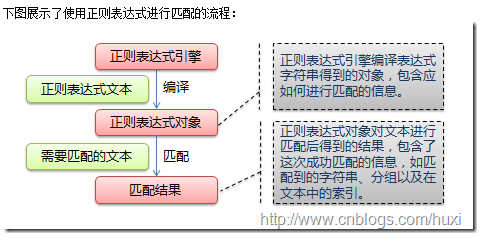

In [8]:
Image(filename="py35_picture\Regular_process.png")

- 正则表达式的大致匹配过程是：
> - 依次拿出表达式和文本中的字符比较，如果每一个字符都能匹配，则匹配成功；一旦有匹配不成功的字符则匹配失败。
> - 如果表达式中有量词或边界，这个过程会稍微有一些不同，但也是很好理解的，看下图中的示例以及自己多使用几次就能明白。

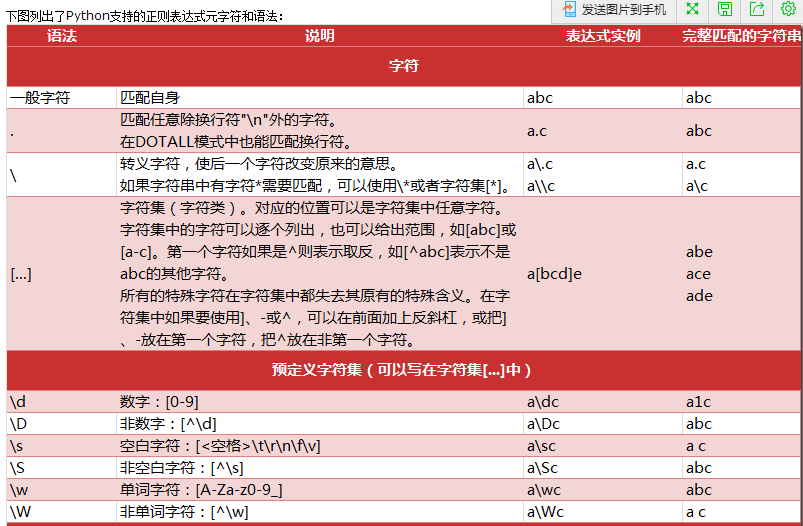

In [9]:
Image(filename="py35_picture\Regular_str.png")

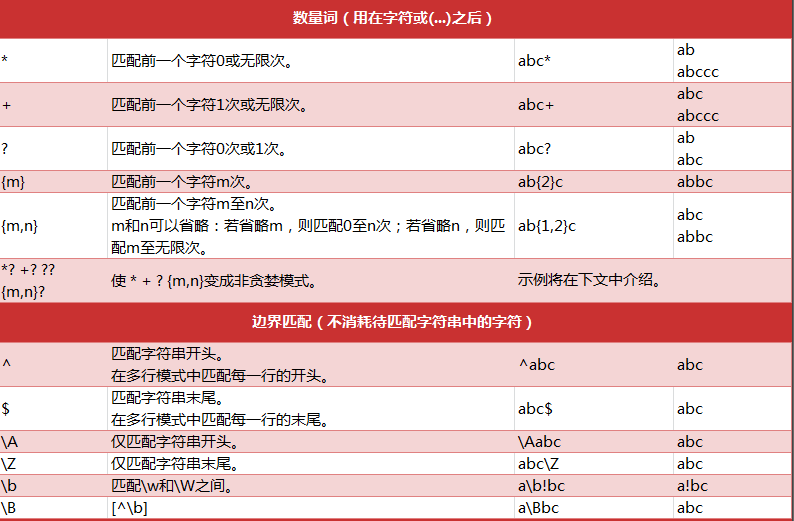

In [10]:
Image(filename="py35_picture\Regular_num.png")

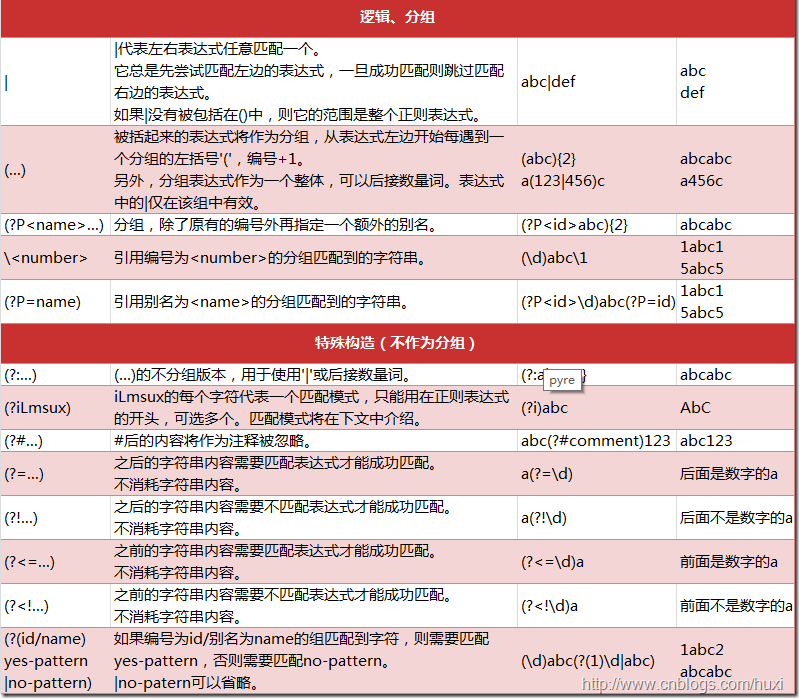

In [11]:
Image(filename="py35_picture\Regular_logic.png")

### 2.2 数量词的贪婪模式与非贪婪模式
- 正则表达式通常用于在文本中查找匹配的字符串。
- Python里数量词默认是贪婪的（在少数语言里也可能是默认非贪婪），总是尝试匹配尽可能多的字符；非贪婪的则相反，总是尝试匹配尽可能少的字符。
> - 例如：正则表达式"ab*"如果用于查找"abbbc"，将找到"abbb"。而如果使用非贪婪的数量词"ab*?"，将找到"a"。

### 2.3 反斜杠的困扰
- 与大多数编程语言相同，正则表达式里使用"\"作为转义字符，这就可能造成反斜杠困扰。
- 假如你需要匹配文本中的字符"\"，那么使用编程语言表示的正则表达式里将需要4个反斜杠"\\\\"：前两个和后两个分别用于在编程语言里转义成反斜杠，转换成两个反斜杠后再在正则表达式里转义成一个反斜杠。
- Python里的原生字符串很好地解决了这个问题，这个例子中的正则表达式可以使用r"\\"表示。同样，匹配一个数字的"\\d"可以写成r"\d"。有了原生字符串，你再也不用担心是不是漏写了反斜杠，写出来的表达式也更直观。

### 2.4 匹配模式
- 正则表达式提供了一些可用的匹配模式，比如忽略大小写、多行匹配等，这部分内容将在Pattern类的工厂方法re.compile(pattern[, flags])中一起介绍。